In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import seaborn as sns

In [7]:
global Eta,Connec,Kappa,Abun0,mu0,mu1,D,Nm1,Nm2

In [8]:
def ARGMove(y,t):
    s0=y[0]
    s1=y[1]
    r0=y[2]
    r1=y[3]
    dydt=[mu0*s0*(1-(s0+s1)/Nm1)-Eta*s0*(s1+Connec*r1)+Kappa*s1-D*s0,
        mu1*s1*(1-(s0+s1)/Nm1)+Eta*s0*(s1+Connec*r1)-Kappa*s1-D*s1,
        mu0*r0*(1-(r0+r1)/Nm2)-Eta*r0*(r1+Connec*s1)+Kappa*r1-D*r0,
        mu1*r1*(1-(r0+r1)/Nm2)+Eta*r0*(r1+Connec*s1)-Kappa*r1-D*r1]
    return dydt

In [9]:
Connec=0.04
Kappa=0.01
Abun0=0.01
mu0=0.5
mu1=0.48
D=0.02
Etas=[0.01,0.015,0.02]

MM=2
Nm1s=np.arange(0.01,MM/2,0.05*MM/2)
Num=len(Nm1s)

frac=np.zeros((len(Etas),Num))
Entropy=np.zeros((len(Etas),Num))

for j in range(len(Etas)):
    Eta=Etas[j]
    for i in range(Num):
        Nm1=Nm1s[i]
        Nm2=MM-Nm1

        n1=Nm1/(Nm1+Nm2)
        n2=Nm2/(Nm1+Nm2)
        Entropy[j,i]=np.exp(-n1*np.log(n1)-n2*np.log(n2))/2
        ff=0.01
        Initial=[ff*Nm1,ff*Nm1,ff*Nm2,ff*Nm2]
        timespan=np.arange(0,1000,1)
        y1=odeint(ARGMove,Initial,timespan)
        S0=y1[-1,0]
        S1=y1[-1,1]
        R0=y1[-1,2]
        R1=y1[-1,3]
        frac[j,i]=(S1+R1)/(S0+S1+R0+R1)

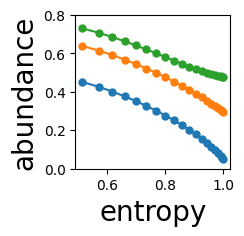

In [10]:
plt.figure(figsize=(2,2))
for i in range(len(Etas)):
    plt.plot(Entropy[i,:],frac[i,:],'-',marker='o',markersize=5)
#plt.yscale('log')
plt.ylim(0,0.8)
plt.xlabel('entropy',fontsize=20)
plt.ylabel('abundance',fontsize=20)
plt.savefig('Simulations_MM2.pdf')
plt.show()